In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import RMSprop

C:\Users\agodbole\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
%matplotlibinline

UsageError: Line magic function `%matplotlibinline` not found.


In [4]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

In [5]:
from keras import backend as K

if K.image_data_format() == 'channels_first':
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 1, 28, 28)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    train_images = mnist_train_images.reshape(mnist_train_images.shape[0], 28, 28, 1)
    test_images = mnist_test_images.reshape(mnist_test_images.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [6]:
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

In [7]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1462)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


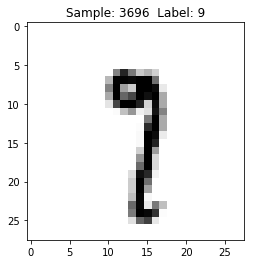

In [8]:
display_sample(3696)

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 198s - loss: 0.1958 - acc: 0.9418 - val_loss: 0.0485 - val_acc: 0.9836
Epoch 2/10
 - 199s - loss: 0.0839 - acc: 0.9755 - val_loss: 0.0419 - val_acc: 0.9867
Epoch 3/10
 - 199s - loss: 0.0618 - acc: 0.9816 - val_loss: 0.0322 - val_acc: 0.9886
Epoch 4/10
 - 198s - loss: 0.0517 - acc: 0.9842 - val_loss: 0.0336 - val_acc: 0.9892
Epoch 5/10
 - 200s - loss: 0.0441 - acc: 0.9863 - val_loss: 0.0393 - val_acc: 0.9881
Epoch 6/10
 - 198s - loss: 0.0392 - acc: 0.9877 - val_loss: 0.0285 - val_acc: 0.9912
Epoch 7/10
 - 198s - loss: 0.0340 - acc: 0.9892 - val_loss: 0.0307 - val_acc: 0.9908
Epoch 8/10
 - 198s - loss: 0.0310 - acc: 0.9901 - val_loss: 0.0267 - val_acc: 0.9928
Epoch 9/10
 - 197s - loss: 0.0271 - acc: 0.9912 - val_loss: 0.0294 - val_acc: 0.9916
Epoch 10/10
 - 198s - loss: 0.0244 - acc: 0.9919 - val_loss: 0.0277 - val_acc: 0.9927


In [13]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.02770833413057876
Test accuracy: 0.9927


How good is 99% ?

https://keras.io/examples/mnist_cnn/
https://www.udemy.com/data-science-and-machine-learning-with-python-hands-on/learn/lecture/8059022#overview